PR-new-logo-orizontal (1).svg
# **Lab01PR. Introducere in Data Science**

# Scopul Laboratorului

In cadrul primului laborator vom exersa manipularea si extragerea informatiilor din dataset-uri folosind biblioteci din limbajul Python.


### *Atentie!* Inainte de a incepe laboratorul descarcati dataset-urile de la link-ul următor https://drive.google.com/file/d/150MHlLzas_lvvDHxNDxQFZT2E2RTd441/view?usp=sharing si incarcati-le la Files in Colab ca in exemplu
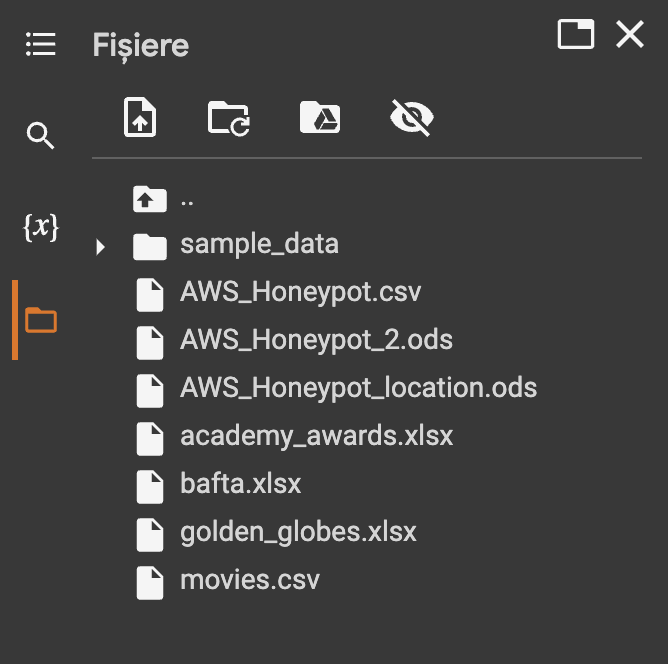


# Cuvinte-Cheie

*   Numpy
*   Pandas
*   Series
*   DataFrame
*   Data Cleaning

# Utilizari in Lumea Reala

*   analiza metricilor unui sistem/unei aplicatii (performante, erori)
*   meteorologie (vizualizare, predictii)
*   statistici in domeniul medical (de exemplu, rata de imbolnavire cu un virus la persoanele vacinate fata de cele vaccinate)
*   observarea tendintelor sociale/politice/financiare (corelarea studiilor sau a categoriei de varsta cu preferintele unui individ)
*   procesarea limbajului natural
*   analiza feedback-ului consumatorilor (pentru imbunatatirea serviciilor)
*   analiza retelelor sociale

![picture](https://drive.google.com/uc?export=view&id=1bUWb8LXnkmviWqnCRbNPSjC0L3e7m49d)


# Python Memento

Amitim cateva facilitati oferite de limbajul Python:

### List Comprehension
Creeaza o lista pornind de la elementele unei alte liste intr-un one-liner.

In [2]:
import numpy
integers = [x for x in list(range(0, 10))]
print(integers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Slicing
Extrage un fragment contiguu dintr-o lista.


*Atentie!* Un slice [n:m] va intoarce elementele listei pornind *de la indexul n pana la indexul m-1*, intrucat indexarea in Python incepe de la 0.

In [3]:
half = integers[:5]
print(half)

[0, 1, 2, 3, 4]


In [4]:
mid = integers[4:6]
print(mid)

[4, 5]


In [5]:
all = integers[:]
print(all)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Lambdas

Lambdas sunt functii anonime scrise ca one-liner. Pot primi oricate argumente si pot fi date drept parametru pentru functionale.

In [6]:
foo = lambda x: x ** 2 + 3 * x + 1
foo(5)

41

### Functional Programming

# Optional: Good to know

### Filter

In [7]:
filter(lambda x: x % 2 == 1, integers)


In [8]:
odd = list(filter(lambda x: x % 2 == 1, integers))
print(odd)

[1, 3, 5, 7, 9]


### Map

In [9]:
squares = list(map(lambda x: x ** 2, integers))
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


### Reduce

In [10]:
from functools import reduce
sum = reduce(lambda x, y: x + y, integers)
print(sum)
initial_value = 10
sum = reduce(lambda x, y: x + y, integers, initial_value)
print(sum)

45
55


# NumPy

NumPy este o biblioteca pentru limbajul Python specializata pe operatii matematice (structuri de date dedicate, vectorizari, functii optimizate). Ofera instrumente de creare, stocare si manipulare a informatiilor, ceea ce faciliteaza integrarea cu numeroase baze de date.

## Programare orientata pe Array-uri

Elementul de baza in manipularea datelor folosind NumPy este np.array. Acesta poate fi creat fie pornind de la una sau mai multe liste, fie folosind functii speciale.

In [11]:
import numpy as np

# array uni-dimensional de 5 elemente
uni = np.array([0, 1, 2, 3, 4])
print(uni)
print(type(uni))

[0 1 2 3 4]
<class 'numpy.ndarray'>


In [12]:
# array multi-dimensional, cu 2 dimensiuni, fiecare avand 4 elemente
multi = np.array([[1, 1, 2, 3], [5, 8, 13, 21]])
print(multi)

[[ 1  1  2  3]
 [ 5  8 13 21]]


Pentru a afla *dimensiunile unui np.array*, putem folosi urmatoarele atribute:
*   *shape*: forma array-ului (distributia elementelor pe linii si coloane)
*   *ndim*: numarul de dimensiuni
*   *size*: numarul total de elemente din array

In [13]:
print("Array shapes:")
print(uni.shape)
print(multi.shape)
print("\n")

print("Array dimensions:")
print(uni.ndim)
print(multi.ndim)
print("\n")

print("Array size:")
print(uni.size)
print(multi.size)

Array shapes:
(5,)
(2, 4)


Array dimensions:
1
2


Array size:
5
8


Cum putem adauga o noua dimensiune la un np.array?

Exista doua variante: \
&emsp; - fie prin apelul metodei reshape careia ii dam drept parametrii *shape*-urile pe care ni le dorim sa le aiba *ndarray*-ul nostru \
&emsp; - fie prin apelul lui np.newaxis in interiorul [] care va adauga o noua dimensiune cu marimea 1 in pozitia in care este pus apelul; acest np.newaxis este doar un alias pentru *None*

In [14]:
uni_reshaped = uni.reshape(5, 1)
print(uni_reshaped.shape)

(5, 1)


In [15]:
uni_reshaped = uni[:, np.newaxis]
print(uni_reshaped.shape)

(5, 1)


In [16]:
uni_reshaped = uni[:, None]
print(uni_reshaped.shape)

(5, 1)


In [17]:
# array multi-dimensional generat cu numere random:
# np.random.rand(dim_no, dim_size)
np.random.rand(2, 4)

array([[0.98723436, 0.13287061, 0.7024509 , 0.46457434],
       [0.00937516, 0.70642575, 0.06834662, 0.32522345]])

**Observatie**: In momentul generarii de numere aleatore folosind este recomandata folosirea unui *random seed*. Utilitatea acestui *random seed* rezida din dorinta noastra de a avea rezultate replicabile si de catre altii in momentul in care realizam experimente, astfel incat sa nu lucram pe numere diferite la rulari diferite. Singura conditie ce trebuie respectata de catre acest *random seed* este ca el sa nu fie aleatoriu la randul sau.

In [18]:
# array generat printr-un interval si un pas:
# np.arrange(start, stop, step)
third = np.arange(0, 21, 3)
print(third)

[ 0  3  6  9 12 15 18]


In [19]:
# interval si un numar de elemente distribuite simetric intr-un spatiu liniar:
# np.linspace(start, stop, elem_no)
np.linspace(0, 10, 9)


array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ])

## Functii Statistice si de Agregare


# Optional: Good to know

In [20]:
neg = [x for x in range(-10, 0)]
pos = [x for x in range(1, 11)]
arr = np.array([neg, pos])
print(arr)

[[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1]
 [  1   2   3   4   5   6   7   8   9  10]]


###    *Media Aritmetica: np.mean()*



In [21]:
# media pe axa liniilor
print(np.mean(arr, axis=0))

[-4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5]


In [22]:
# media pe axa coloanelor
print(np.mean(arr, axis=1))

[-5.5  5.5]


In [23]:
# media tuturor elementelor
print(np.mean(arr))

0.0


### *Deviatia Standard:   np.std()*

*Reminder*: deviatia standard indica dispersia unui set de date relativ la media elementelor sale

    std = sqrt(mean(x)), unde x = abs(arr - arr.mean())**2


In [24]:
np.std(arr)

6.2048368229954285

In [25]:
np.std(arr, axis=0)

array([5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5])

In [26]:
np.std(arr, axis=1)

array([2.87228132, 2.87228132])

### *Suma, Produs: np.sum(), np.prod()*

In [27]:
np.sum(arr)

0

In [28]:
np.sum(arr, axis=0)

array([-9, -7, -5, -3, -1,  1,  3,  5,  7,  9])

In [29]:
np.sum(arr, axis=1)

array([-55,  55])

In [30]:
np.prod(arr, axis=0)

array([-10, -18, -24, -28, -30, -30, -28, -24, -18, -10])

### *Min, Max: np.min(), np.max()*

In [31]:
np.min(arr)

-10

In [32]:
np.max(arr, axis=1)

array([-1, 10])

### *Min index, Max index: np.argmin(), np.argmax()*

In [33]:
np.argmin(arr)

0

In [34]:
np.argmax(arr, axis=1)

array([9, 9])

## Vectorizari

In contextul limbajelor high-level (precum Python, MATLAB, R), vectorizarea descrie utilizarea codului optimizat si pre-compilat pentru a realiza operatii asupra unor secvente de date. Acest lucru presupune executia in-place a operatiei asupra tuturor elementelor colectiei, fara a mai fi nevoie de o iteratie explicita.

Putem observa eficienta vectorizarii prin aplicarea functiei sum() in urmatorul exemplu:

In [35]:
import timeit

rand_arr = np.random.rand(30, 30)
rand_arr_vect = rand_arr
rand_arr_iter = rand_arr

def add_vect(arr):
  sum = np.sum(arr)

def add_iter(arr):
  sum = 0
  for num in arr:
    sum += num

In [36]:
%timeit add_vect(rand_arr_vect)

5.26 µs ± 322 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [37]:
%timeit add_iter(rand_arr_iter)

36.1 µs ± 9.94 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Indexare Booleana
Daca dorim sa accesam doar elementele care respecta o anumita conditie, putem folosi indexarea booleana.

Aceasta presupune crearea unei *masti booleene* (ce verifica pentru fiecare element conditia data si indica True sau False in dreptul fiecarui index, daca aceasta este verificata sau nu), Rezultatul mastii este folosit ulterior drept index pentru gasirea valorilor cautate.

Mastile booleene functioneaza pe array-uri continand orice tip de date (ex. numerice, string, bool).

In [38]:
arr = np.array([[-10,8,-6,4],
              [-2,0,2,-4],
              [6,-8,10,-12]])
print(arr)

[[-10   8  -6   4]
 [ -2   0   2  -4]
 [  6  -8  10 -12]]


Sa presupunem ca dorim sa extragem doar elementele pozitive din array.

In [39]:
# cream o masca pentru a gasi pozitiile ce respecta conditia
mask = arr >= 0
print(mask)

[[False  True False  True]
 [False  True  True False]
 [ True False  True False]]


In [40]:
# extragem elementele de pe pozitiile marcate cu True in masca
pos = arr[mask]
print(pos)

[ 8  4  0  2  6 10]


## Slicing

NumPy ofera posibilitatea de a extrage o vedere dintr-un array multidimensional prin slicing, similar cu cel din cazul listelor.

In [41]:
arr = np.array([[10, 11, 12, 13, 14],
               [15, 16, 17, 18, 19],
               [20, 21, 22, 23, 24],
               [25, 26, 27, 28, 29]])

# primul slice extrage liniile, iar cel de-al doilea coloanele cu indecsii specificati
print(arr[1:3, 2:5])

[[17 18 19]
 [22 23 24]]


# Pandas

Pandas este o biblioteca pentru limbajul Python specializata pe lucrul cu date, construita peste NumPy. Datorita facilitatilor pe care le ofera, este extrem de utila in preprocesarea, analiza, si vizualizarea datelor, precum si in analiza statistica sau machine learning.

## Series

Un Pandas Series este un array *unidimensional* (sau, mai simplu, o coloana) care poate contine orice tip de date.

Array-ul este *indexat* fie prin valori numerice, fie prin label-uri nominale.

### Cum putem crea Pandas Series?

#### 1. Pornind de la o *lista*

In [42]:
import numpy as np
import pandas as pd

topics = ['Data Science', 'Networking', 'Machine Learning', 'Bioinformatics', 'Cyber security', None]
pd.Series(topics)

0        Data Science
1          Networking
2    Machine Learning
3      Bioinformatics
4      Cyber security
5                None
dtype: object

#### 2. Pornind de la un *dictionar*

In [43]:
students_topics = {'Jack' : 'Networking',
                   'Chloe' : 'Machine Learning',
                   'Frank' : 'Cyber security',
                   'Barbara' : 'Bioinformatics'}
s = pd.Series(students_topics)
print(s)
print(s.index)

Jack             Networking
Chloe      Machine Learning
Frank        Cyber security
Barbara      Bioinformatics
dtype: object
Index(['Jack', 'Chloe', 'Frank', 'Barbara'], dtype='object')


#### 3. Pornind de la *o lista de valori si o lista de indecsi*

In [44]:
s = pd.Series(['Data Science', 'Bioinformatics', 'Networking'], index=['Alice', 'Claire', 'John'])
print(s)
print(s.index)

Alice       Data Science
Claire    Bioinformatics
John          Networking
dtype: object
Index(['Alice', 'Claire', 'John'], dtype='object')


### Cum accesam datele din Pandas Series?


#### 1. **iloc**: prin pozitia indexului in cadrul Series

In [45]:
s.iloc[1]

'Bioinformatics'

#### 2. **loc**: prin valoarea indexului

In [46]:
s.loc['Claire']

'Bioinformatics'

#### Conventie
Pentru a creste lizibilitatea codului, biblioteca Pandas foloseste o conventie de indexare:
 * daca vom accesa un element folosind un index *de tip intreg*, accesarea va fi echivalenta cu cea folosind atributul *iloc*
 * daca vom accesa un element folosind un index *de tip obiect*, accesarea va fi echivalenta cu cea folosind atributul *loc*

In [47]:
s[1]

'Bioinformatics'

In [48]:
s['Claire']

'Bioinformatics'

*Atentie!* Accesarea folosind un index *de tip intreg* poate fi inselatoare. Astfel, daca indecsii din Series sunt *de tip intreg*, in momentul accesarii pot aparea erori cauzate de faptul ca index-ul pe care dorim sa il folosim nu se afla in Series. Spre exemplu:

In [49]:
s = pd.Series({20: 'John',
               21: 'Claire',
               22: 'Chloe'})
s[0]

KeyError: ignored

Pentru a nu ne lovi de aceasta eroare vom folosi atributul iloc pentru a accesa primul element din Series.

In [50]:
s.iloc[0]

'John'

## DataFrame

DataFrame este structura cea mai folosita din Pandas.

Reprezinta un array *bidimensional* indexat (numeric sau nominal), in care o linie indica valori pentru o anumita intrare in setul de date, iar o coloana marcheaza elementul masurat. Astfel, valorile de pe o linie *pot* avea tipuri de date diferite, insa cele de pe o coloana *trebuie* sa fie omogene.

### Cum putem crea un DataFrame?

#### 1. Pornind de la un *dictionar* / o *lista de dictionare*

In [51]:
import pandas as pd
import numpy as np

# dictionar
subjects = {"Subject": ["Computer Programming", "Data Structures"],\
            "Credits": ["5", "5"]}
df = pd.DataFrame(subjects)
df


,Subject,Credits
0,Computer Programming,5
1,Data Structures,5


In exemplul precedent, indecsii iau automat valori numerice pornind de la 0.

Avem insa posibilitatea de a seta indexul dataframe-ului *la momentul crearii* prin argumentul ***index=***:

In [52]:
df = pd.DataFrame(subjects, index=["S1", "S2"])
df

,Subject,Credits
S1,Computer Programming,5
S2,Data Structures,5


Indexul mai poate fi setat la o coloana existenta folosind ***.set_index("column_name")***:

In [53]:
# lista de dictionare
students = [{"Name": "Alice", "Subject": "Computer Programming", "Score": 90},\
            {"Name": "Bob", "Subject": "Computer Programming", "Score": 88}]
df = pd.DataFrame(students)
df.set_index("Name")

,Subject,Score
Name,,
Alice,Computer Programming,90
Bob,Computer Programming,88


Putem reseta indecsii la valorile initiale cu ajutorul ***.reset_index()***:

In [54]:
df.reset_index()
df

,Name,Subject,Score
0,Alice,Computer Programming,90
1,Bob,Computer Programming,88


#### 2. Pornind de la un *NumPy ndarray*

In [55]:
students = np.array([["", 'Subject', 'Score'],
                ["Alice", "Computer Programming", 90],
                ["Bob", "Computer Programming", 88]])

df = pd.DataFrame(data=students[1:, 1:],\
                  index=students[1:, 0],\
                  columns=students[0, 1:])
df

,Subject,Score
Alice,Computer Programming,90
Bob,Computer Programming,88


#### 3. Pornind de la Pandas *Series*

In [56]:
# creare a unei pd.Series pornind de la o lista
subjects = pd.Series(["Computer Programming", "Data Structures",\
                      "OOP", "Programming Paradigms"])
subjects

0     Computer Programming
1          Data Structures
2                      OOP
3    Programming Paradigms
dtype: object

In [57]:
df = pd.DataFrame(subjects, columns=["Subject"])
df

,Subject
0,Computer Programming
1,Data Structures
2,OOP
3,Programming Paradigms


#### 4. Citind dataset-ul dintr-un *fisier* (.csv, .json, .xlsx etc.)

In [58]:
df = pd.read_csv("AWS_Honeypot.csv")
df.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,country,locale,latitude,longitude
0,3/8/13 1:11,groucho-tokyo,1398184219,TCP,NaN,2065.0,23.0,83.86.153.27,Netherlands,South Holland,52.1763,4.5282
1,3/8/13 1:12,groucho-tokyo,1393252776,TCP,NaN,4667.0,23.0,83.11.89.168,Poland,Kujawsko-Pomorskie,52.5931,19.0894
2,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
3,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
4,3/8/13 1:16,groucho-tokyo,411470328,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266


Cum putem afla informatii despre dataframe-ul creat?

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   444 non-null    object 
 1   host       444 non-null    object 
 2   src        444 non-null    int64  
 3   proto      444 non-null    object 
 4   type       56 non-null     float64
 5   spt        388 non-null    float64
 6   dpt        388 non-null    float64
 7   srcstr     444 non-null    object 
 8   country    434 non-null    object 
 9   locale     380 non-null    object 
 10  latitude   443 non-null    float64
 11  longitude  443 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 41.8+ KB


Acest apel de **df.info()** ne va da mai multe detalii precum coloanele ce le contine dataframe-ul creat de noi, tipurile datelor stocate pe acele coloane, numarul de valori ce nu sunt
nule pe acele coloane, cat si memoria pe care o ocupa dataframe-ul nostru. \
De retinut: **memoria utilizata de dataframe** ce este intoarsa de **df.info()** este **memorie principala (RAM)** pentru ca *pandas* incarca dataframe-ul in RAM. Acest lucru poate fi costisitor si poate deveni un *bottleneck* in momentul in care lucram cu *Big Data*. \
Daca, totusi, dorim sa lucram cu date care sunt generate continuu, putem folosi Dask [1] sau PySpark [2].

## Valori Lipsa

In practica, putem intalni seturi de date cu valori lipsa. Un data scientist va deduce semnificatia acestora sau le va elimina in procesul de *data cleaning*.

NumPy foloseste ***np.nan*** pentru a indica valori lipsa. NaN (Not a Number) este o valoare de tip float in standardul IEEE, fapt ce permite utilizarea operatiilor matematice asupra structurilor care o contin. Toate operatiile efectuate asupra unor structuri ce contin NaN vor intoarce, la randul lor, NaN.

*Atentie!* np.nan este diferit de None, obiect de tip NoneType care nu accepta operatii matematice.

In [60]:
a = None
b = np.nan
print(a is b)

False


In [61]:
floats = np.array([2, np.nan, -1.3])
print(np.sum(floats))

nan


Pentru a verifica daca o structura contine sau nu valori lipsa, putem folosi *isnull()*.

In [62]:
series = pd.Series(["Jack", np.nan, "Frank", None])
series.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In momentul in care lucram cu valori lipsa trebuie sa avem o atentie sporita atunci cand este nevoie sa aplicam asupra lor functii statistice si de agregare din NumPy.

Cel mai bun exemplu in acest sens este reprezentat de utilizarea functiilor precum np.average, np.mean, np.std. Daca aceste functii sunt aplicate pe un set de date care contine valori lipsa, rezultatul intors de ele va fi np.nan.

In [63]:
np.average(floats)

nan

In [64]:
np.mean(floats)

nan

Pentru a putea aplica functiile statistice si de agregare pe care le dorim numai asupra datelor relevante au aparut functiile corespondente - np.nanmean, np.nanstd. Aceste functii sunt construite in asa mod incat sa nu ia in considerare valorile de tip np.nan in momentul calculului.

In [65]:
np.nanmean(floats)

0.35

In [66]:
np.nanstd(floats)

1.65

### **Demo DataFrames**

Vom folosi setul de date *AWS_Honeypot.csv*.

#### *Ce este un Honeypot?*

Un *honeypot* reprezinta un sistem atasat la retea drept "momeala" pentru atacurile cibernetice. Fiind intentionat vulnerabil, acesta face posibila detectarea, devierea si investigarea incercarilor neautorizate de a accesa informatii interne din sistemul principal. Masinile virtuale sunt deseori utilizate pentru a hosta honeypot-uri (pot fi usor restaurate daca sunt compromise).
* *honeynet*: doua sau mai multe honeypot-uri
* *honey farm*: colectie centralizata de honeypot-uri si instrumente de analiza a datelor

![picture](https://drive.google.com/uc?export=view&id=1plXhhQF78u1NYy62JD49EK3vKwJOpv-O)

In acest demo vom simula un analizor de honeypot.



In [67]:
import pandas as pd
import numpy as np

# tinem datasetul honeypot intr-un dataframe
honeypot = pd.read_csv("AWS_Honeypot.csv")
honeypot.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,country,locale,latitude,longitude
0,3/8/13 1:11,groucho-tokyo,1398184219,TCP,NaN,2065.0,23.0,83.86.153.27,Netherlands,South Holland,52.1763,4.5282
1,3/8/13 1:12,groucho-tokyo,1393252776,TCP,NaN,4667.0,23.0,83.11.89.168,Poland,Kujawsko-Pomorskie,52.5931,19.0894
2,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
3,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
4,3/8/13 1:16,groucho-tokyo,411470328,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266


#### Cum accesam datele dintr-un dataframe?

##### 1. ***iloc***

In mod similar cu Series, atributul iloc[n] va intoarce a n-a inregistrare din tabel.

Verificam data ultimei inregistrari din honeypot, inainte de restaurare:

In [68]:
# va returna ultima intrare/rand din dataframe
honeypot.iloc[-1]

datetime           3/8/13 7:36
host         groucho-singapore
src                 3342555165
proto                     ICMP
type                       0.0
spt                        NaN
dpt                        NaN
srcstr            199.59.88.29
country          United States
locale                Michigan
latitude               42.5065
longitude             -83.3491
Name: 443, dtype: object

In [69]:
# va returna primul element din ultima intrare din dataframe ce corespunde
# "datetime"-ului
honeypot.iloc[-1, 0]

'3/8/13 7:36'

##### 2. ***loc***

Pentru a extrage datele despre toate atacurile cu sursa in Romania, putem indexa dupa tara, apoi selecta dupa label folosind atributul loc:

In [70]:
honeypot.reset_index(inplace=True)
honeypot.set_index("country", inplace=True)
honeypot.loc["Romania"]

,index,datetime,host,src,proto,type,spt,dpt,srcstr,locale,latitude,longitude
country,,,,,,,,,,,,
Romania,8,3/8/13 1:19,groucho-tokyo,1598862399,TCP,NaN,3221.0,445.0,95.76.180.63,Judetul Buzau,45.15,26.8333
Romania,9,3/8/13 1:20,groucho-tokyo,1598862399,TCP,NaN,3221.0,445.0,95.76.180.63,Judetul Buzau,45.15,26.8333
Romania,297,3/8/13 5:28,groucho-tokyo,1496007151,TCP,NaN,2991.0,445.0,89.43.65.239,Judetul Calarasi,44.20,27.3333
Romania,298,3/8/13 5:28,groucho-tokyo,1496007151,TCP,NaN,2991.0,445.0,89.43.65.239,Judetul Calarasi,44.20,27.3333


In [71]:
# pentru a gasi "locale" pentru Romania
honeypot.loc["Romania", "locale"].drop_duplicates()

country
Romania       Judetul Buzau
Romania    Judetul Calarasi
Name: locale, dtype: object

Putem folosi atributul loc pentru preluarea datelor dupa orice label nominal:

In [72]:
# folosind .loc si masca booleana putem gasi toate atacurile din Germania
honeypot = pd.read_csv("AWS_Honeypot.csv")
honeypot.loc[honeypot["country"]=="Germany"]

,datetime,host,src,proto,type,spt,dpt,srcstr,country,locale,latitude,longitude
4,3/8/13 1:16,groucho-tokyo,411470328,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266
90,3/8/13 2:34,groucho-tokyo,1599664467,TCP,NaN,2878.0,23.0,95.88.241.83,Germany,Rheinland-Pfalz,49.5372,8.3550
121,3/8/13 2:35,groucho-tokyo,1311714319,TCP,NaN,47243.0,22.0,78.47.44.15,Germany,NaN,51.0000,9.0000
122,3/8/13 2:35,groucho-tokyo,1311714319,TCP,NaN,47243.0,22.0,78.47.44.15,Germany,NaN,51.0000,9.0000


##### 3. Folosind *numele unei coloane*

Extragem toate tarile din care s-au incercat atacurile catre acest honeypot:

In [73]:
attacker_countries = honeypot["country"].drop_duplicates(keep="first")
attacker_countries.reset_index(drop=True)

0                Netherlands
1                     Poland
2                      China
3                    Germany
4                    Romania
5             United Kingdom
6              United States
7               South Africa
8                Philippines
9                     Taiwan
10               South Korea
11                    Brazil
12                 Hong Kong
13                       NaN
14                     India
15                    Latvia
16                    Canada
17    Bosnia and Herzegovina
18                 Indonesia
19                    France
20      United Arab Emirates
21                  Malaysia
22                  Thailand
23                   Austria
24                   Vietnam
25                 Australia
26                     Japan
27                 Sri Lanka
28                    Israel
Name: country, dtype: object

De ce necesar apelul de **drop_duplicates()** in procesul de *curatare* al datelor? \
Deoarece in momentul in care antrenam algoritmi de *Machine Learning* pe seturi de date care contin duplicate, acestea pot favoriza un anumit exemplu sau anumite *features* ce sunt extrase din acel exemplu in detrimentul altora, din cauza ponderii pe care o au. De asemenea, poate pastrarea duplicatelor face mai usor *data leakage*-ul despre care vom vorbi in Laboratorul 10.  

##### 4. Prin *slicing* si/sau *subsetting* (lista de indecsi, coloane)

In [74]:
honeypot.loc[:100, ["datetime", "spt", "dpt"]]

,datetime,spt,dpt
0,3/8/13 1:11,2065.0,23.0
1,3/8/13 1:12,4667.0,23.0
2,3/8/13 1:14,NaN,NaN
3,3/8/13 1:14,NaN,NaN
4,3/8/13 1:16,3422.0,23.0
...,...,...,...
96,3/8/13 2:33,5093.0,5066.0
97,3/8/13 2:33,5093.0,5070.0
98,3/8/13 2:33,5093.0,5068.0
99,3/8/13 2:33,5093.0,5064.0


#### Cum redenumim titlurile coloanelor?

##### 1. ***df.rename***

df.rename(columns={old:new, ...})

In [75]:
honeypot.rename(columns={"src": "bandwidth", "srcstr": "ip"}, inplace=True)
honeypot.head()

,datetime,host,bandwidth,proto,type,spt,dpt,ip,country,locale,latitude,longitude
0,3/8/13 1:11,groucho-tokyo,1398184219,TCP,NaN,2065.0,23.0,83.86.153.27,Netherlands,South Holland,52.1763,4.5282
1,3/8/13 1:12,groucho-tokyo,1393252776,TCP,NaN,4667.0,23.0,83.11.89.168,Poland,Kujawsko-Pomorskie,52.5931,19.0894
2,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
3,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
4,3/8/13 1:16,groucho-tokyo,411470328,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266


##### 2. ***mapper***

Este folosit tot prin df.rename().

De aceasta data, este data ca parametru o functie (mapper) care indica modificarile asupra titlurilor coloanelor (axis=1) sau indecsilor (axis=0).

In [76]:
def port_foo(column):
  if (column == "spt"):
    return "Src Port"
  if (column == "dpt"):
    return "Dst Port"
  return column

honeypot.rename(mapper=port_foo, axis=1, inplace=True)
honeypot.head()

,datetime,host,bandwidth,proto,type,Src Port,Dst Port,ip,country,locale,latitude,longitude
0,3/8/13 1:11,groucho-tokyo,1398184219,TCP,NaN,2065.0,23.0,83.86.153.27,Netherlands,South Holland,52.1763,4.5282
1,3/8/13 1:12,groucho-tokyo,1393252776,TCP,NaN,4667.0,23.0,83.11.89.168,Poland,Kujawsko-Pomorskie,52.5931,19.0894
2,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
3,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
4,3/8/13 1:16,groucho-tokyo,411470328,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266


##### 3. ***df.columns***

df.columns = ["col0_new", "col1_new", ....]

Se precizeaza noile valori pentru toate coloanele, in ordine.

In [77]:
honeypot.columns = ["DateTime", "Host", "Bandwidth", "Protocol",\
                    "Type", "SrcPort", "DstPort", "IP", "Country",\
                    "Locale", "Latitude", "Longitude"]
honeypot.head()

,DateTime,Host,Bandwidth,Protocol,Type,SrcPort,DstPort,IP,Country,Locale,Latitude,Longitude
0,3/8/13 1:11,groucho-tokyo,1398184219,TCP,NaN,2065.0,23.0,83.86.153.27,Netherlands,South Holland,52.1763,4.5282
1,3/8/13 1:12,groucho-tokyo,1393252776,TCP,NaN,4667.0,23.0,83.11.89.168,Poland,Kujawsko-Pomorskie,52.5931,19.0894
2,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
3,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
4,3/8/13 1:16,groucho-tokyo,411470328,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266


#### Cum scriem query-uri folosind Boolean Masking?

Vrem sa gasim date despre atacurile din China interceptate incepand cu ora 5:00 (toate inregistrarile din honeypot-ul dat au loc in aceeasi zi) .

*Pandas are functionalitati speciale pentru lucrul cu date si ore. De exemplu, pd.to_datetime() converteste orice format orar la unul standard.*

In [78]:
import datetime
honeypot = pd.read_csv("AWS_Honeypot.csv")
honeypot["datetime"] = pd.to_datetime(honeypot["datetime"])
honeypot.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,country,locale,latitude,longitude
0,2013-03-08 01:11:00,groucho-tokyo,1398184219,TCP,NaN,2065.0,23.0,83.86.153.27,Netherlands,South Holland,52.1763,4.5282
1,2013-03-08 01:12:00,groucho-tokyo,1393252776,TCP,NaN,4667.0,23.0,83.11.89.168,Poland,Kujawsko-Pomorskie,52.5931,19.0894
2,2013-03-08 01:14:00,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
3,2013-03-08 01:14:00,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
4,2013-03-08 01:16:00,groucho-tokyo,411470328,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266


Putem crea doua masti - una pentru fiecare conditie - si sa accesam dataframe-ul cu ajutorul lor.

*Atentie!*
* operatorii logici sunt bitwise-like (fata de Python, unde avem "and", "or")
* locul parantezelor conteaza

Avem doua posibilitati:

##### 1. *df[mask]*

In [79]:
start_time = "2013-03-08 05:00:00"

honeypot[(honeypot["datetime"] >= start_time) & (honeypot["country"] == "China")].reset_index(drop=True)

,datetime,host,src,proto,type,spt,dpt,srcstr,country,locale,latitude,longitude
0,2013-03-08 05:01:00,groucho-tokyo,3658020275,TCP,NaN,6000.0,1433.0,218.8.245.179,China,Heilongjiang Sheng,45.7500,126.6500
1,2013-03-08 05:03:00,groucho-singapore,3729578419,TCP,NaN,6000.0,65500.0,222.76.217.179,China,Fujian,24.4798,118.0819
2,2013-03-08 05:11:00,groucho-singapore,1033070424,TCP,NaN,6000.0,1433.0,61.147.103.88,China,Jiangsu Sheng,32.0617,118.7778
3,2013-03-08 05:14:00,groucho-tokyo,710975177,TCP,NaN,6000.0,3306.0,42.96.158.201,China,Beijing Shi,39.9289,116.3883
4,2013-03-08 05:30:00,groucho-tokyo,1991904499,TCP,NaN,6000.0,1433.0,118.186.12.243,China,Beijing Shi,39.9289,116.3883
...,...,...,...,...,...,...,...,...,...,...,...,...
66,2013-03-08 07:30:00,groucho-oregon,710974991,TCP,NaN,7827.0,1433.0,42.96.158.15,China,Beijing Shi,39.9289,116.3883
67,2013-03-08 07:31:00,groucho-eu,3722483078,TCP,NaN,58313.0,3389.0,221.224.149.134,China,Jiangsu Sheng,32.0617,118.7778
68,2013-03-08 07:31:00,groucho-eu,3722483078,TCP,NaN,58313.0,3389.0,221.224.149.134,China,Jiangsu Sheng,32.0617,118.7778
69,2013-03-08 07:31:00,groucho-eu,3722483078,TCP,NaN,58313.0,3389.0,221.224.149.134,China,Jiangsu Sheng,32.0617,118.7778


##### 2. *df.where(mask)*

Mai jos avem un exemplu de *Pandas Chaining*. Mai multe metode sunt aplicate pe rand aceluiasi obiect prin inlantuire, crescand lizibilitatea codului. In cazul nostru, mai intai aplicam o masca pentru filtrare, apoi eliminam liniile care au cel putin doua valori NaN.

In [80]:
honeypot.where((honeypot["datetime"] >= start_time) & (honeypot["country"] == "China")).dropna(thresh=2)


,datetime,host,src,proto,type,spt,dpt,srcstr,country,locale,latitude,longitude
289,2013-03-08 05:01:00,groucho-tokyo,3.658020e+09,TCP,NaN,6000.0,1433.0,218.8.245.179,China,Heilongjiang Sheng,45.7500,126.6500
291,2013-03-08 05:03:00,groucho-singapore,3.729578e+09,TCP,NaN,6000.0,65500.0,222.76.217.179,China,Fujian,24.4798,118.0819
293,2013-03-08 05:11:00,groucho-singapore,1.033070e+09,TCP,NaN,6000.0,1433.0,61.147.103.88,China,Jiangsu Sheng,32.0617,118.7778
294,2013-03-08 05:14:00,groucho-tokyo,7.109752e+08,TCP,NaN,6000.0,3306.0,42.96.158.201,China,Beijing Shi,39.9289,116.3883
301,2013-03-08 05:30:00,groucho-tokyo,1.991904e+09,TCP,NaN,6000.0,1433.0,118.186.12.243,China,Beijing Shi,39.9289,116.3883
...,...,...,...,...,...,...,...,...,...,...,...,...
432,2013-03-08 07:30:00,groucho-oregon,7.109750e+08,TCP,NaN,7827.0,1433.0,42.96.158.15,China,Beijing Shi,39.9289,116.3883
433,2013-03-08 07:31:00,groucho-eu,3.722483e+09,TCP,NaN,58313.0,3389.0,221.224.149.134,China,Jiangsu Sheng,32.0617,118.7778
434,2013-03-08 07:31:00,groucho-eu,3.722483e+09,TCP,NaN,58313.0,3389.0,221.224.149.134,China,Jiangsu Sheng,32.0617,118.7778
435,2013-03-08 07:31:00,groucho-eu,3.722483e+09,TCP,NaN,58313.0,3389.0,221.224.149.134,China,Jiangsu Sheng,32.0617,118.7778


#### Cum manipulam un DataFrame folosind functionale?

Acest honey farm colecteaza valorile bandwidth-ului unui atac in bps (biti per secunda), ceea ce le face greu de urmarit.

Vom crea o functie care va converti bandwidth-ul la Gbps (gigabiti per secunda) si o vom aplica pe datele din dataframe folosind *apply()*.

In [81]:
honeypot = pd.read_csv("AWS_Honeypot.csv")

def convert_to_gbps(bandwidth):
  return round((float) (bandwidth / (10 ** 9)), 2)

honeypot["src"] = honeypot["src"].apply(lambda x: convert_to_gbps(x))
honeypot.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,country,locale,latitude,longitude
0,3/8/13 1:11,groucho-tokyo,1.40,TCP,NaN,2065.0,23.0,83.86.153.27,Netherlands,South Holland,52.1763,4.5282
1,3/8/13 1:12,groucho-tokyo,1.39,TCP,NaN,4667.0,23.0,83.11.89.168,Poland,Kujawsko-Pomorskie,52.5931,19.0894
2,3/8/13 1:14,groucho-sa,3.66,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
3,3/8/13 1:14,groucho-sa,3.66,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
4,3/8/13 1:16,groucho-tokyo,0.41,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266


#### Optional: Good to know: Cum intelegem datele la nivel de grup? *(groupby)*

Dorim sa interpretam datele in functie de protocolul folosit in atac:

In [ ]:
for group, frame in honeypot.groupby("proto"):
  print(str(group) + ": " + str(len(frame)) + " records")

ICMP: 56 records
TCP: 309 records
UDP: 79 records


##### **GroupBy** este un proces ce implica cel putin unul din pasii *split-apply-combine*:

*   *split*: datele se impart in grupuri dupa un criteriu
*   *apply*: se aplica o functie pe fiecare grup
*   *combine*: rezultatele sunt agregate intr-o structura

La pasul apply, putem folosi groupby() impreuna cu una din functiile:

*Aggregate*

Pasam un dictionar avand numele coloanelor de interpretat drept chei si functiile necesare interpretarii drept valori.

Analizam in continuare grupurile, calculand bandwidth-ul mediu si latitudinea minima pentru fiecare:

In [ ]:
honeypot.groupby("proto").agg({"src": np.nanmean, "latitude": np.min})

,src,latitude
proto,,
ICMP,2.705536,-33.8615
TCP,2.108964,-33.8615
UDP,2.856203,13.7567


*Filter*

Pasam o functie care se aplica pe fiecare grup si intoarce True sau False, in functie de rezultatul grupului la filtru.

Vrem sa gasim informatii doar despre atacurile din grupurile care au media bandwidth-ului mai mare de 2.5 Gbps:

In [ ]:
# gasim informatii doar despre atacurile din grupurile care au media
# bandwidth-ului mai mare de 2.5 Gbps
bw = honeypot.groupby("proto").filter(lambda df: np.nanmean(df["src"]) > 2.5)
bw.reset_index(inplace=True)
bw.drop(columns="index")


,datetime,host,src,proto,type,spt,dpt,srcstr,country,locale,latitude,longitude
0,3/8/13 1:14,groucho-sa,3.66,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
1,3/8/13 1:14,groucho-sa,3.66,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
2,3/8/13 1:21,groucho-eu,2.01,ICMP,8.0,NaN,NaN,119.184.124.10,China,Shandong Sheng,36.6683,116.9972
3,3/8/13 1:21,groucho-eu,2.01,ICMP,8.0,NaN,NaN,119.184.124.10,China,Shandong Sheng,36.6683,116.9972
4,3/8/13 1:22,groucho-sa,3.43,ICMP,3.0,NaN,NaN,204.45.126.12,United States,Colorado,39.7525,-104.9995
...,...,...,...,...,...,...,...,...,...,...,...,...
130,3/8/13 7:35,groucho-us-east,1.92,UDP,NaN,57760.0,54521.0,114.163.112.153,Japan,Tokyo-to,35.6850,139.7514
131,3/8/13 7:35,groucho-us-east,1.92,UDP,NaN,57760.0,54521.0,114.163.112.153,Japan,Tokyo-to,35.6850,139.7514
132,3/8/13 7:35,groucho-us-east,1.92,UDP,NaN,57760.0,54521.0,114.163.112.153,Japan,Tokyo-to,35.6850,139.7514
133,3/8/13 7:36,groucho-us-east,1.92,UDP,NaN,57760.0,54521.0,114.163.112.153,Japan,Tokyo-to,35.6850,139.7514


*Apply*

Pasam o functie care se va aplica pe fiecare grup, oferindu-ne posibilitatea de a pastra rezultatele obtinute in cadrul aceluiasi dataframe.

Intentionam sa grupam atacurile dupa protocolul folosit si sa aflam care este deviatia standard a fiecarui atac fata de media grupului din care face parte.

In [ ]:
df = honeypot[['src', 'proto']]

def compute_std_dev(group):
  avg = np.nanmean(group['src'])
  group['avg'] = avg
  group['std_dev'] = np.abs(avg - group['src'])
  return group

df.groupby('proto').apply(compute_std_dev)

,src,proto,avg,std_dev
0,1.40,TCP,2.108964,0.708964
1,1.39,TCP,2.108964,0.718964
2,3.66,ICMP,2.705536,0.954464
3,3.66,ICMP,2.705536,0.954464
4,0.41,TCP,2.108964,1.698964
...,...,...,...,...
439,1.92,UDP,2.856203,0.936203
440,1.92,UDP,2.856203,0.936203
441,1.92,UDP,2.856203,0.936203
442,1.92,UDP,2.856203,0.936203


#### Cum analizam datele din mai multe surse? *(merging dataframes)*

Pandas vine la dispozitie cu instrumente in acest scop, precum *merge()* (similar join-ului din SQL) si *concat()*.

In [ ]:
first = pd.read_csv("AWS_Honeypot.csv")
first = first.head(5)
print(first.shape)
first

(5, 12)


,datetime,host,src,proto,type,spt,dpt,srcstr,country,locale,latitude,longitude
0,3/8/13 1:11,groucho-tokyo,1398184219,TCP,NaN,2065.0,23.0,83.86.153.27,Netherlands,South Holland,52.1763,4.5282
1,3/8/13 1:12,groucho-tokyo,1393252776,TCP,NaN,4667.0,23.0,83.11.89.168,Poland,Kujawsko-Pomorskie,52.5931,19.0894
2,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
3,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136
4,3/8/13 1:16,groucho-tokyo,411470328,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266


In [ ]:
pip install pandas-ods-reader

     |████████████████████████████████| 6.3 MB 36.7 MB/s 
     |████████████████████████████████| 125 kB 68.4 MB/s 
  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49002 sha256=10974f6b33f20201329e6ca8479357a61cbaf960d184d91d4a44a1e9c7078bad
  Stored in directory: /root/.cache/pip/wheels/8f/60/52/bffa36b97e0136aa62d54948d56e8770b96a5da7f9c65fdd85
Successfully built ezodf
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install odfpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=2d3968399f2fbe950f704f147bd964cad4e871e78ee21fba1a5cdc2f6ab951db
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


In [ ]:
#loc = pd.read_ods("AWS_Honeypot_location.ods")
loc = pd.read_excel("AWS_Honeypot_location.ods", engine="odf")
loc = loc.head(10)
print(loc.shape)
loc

(10, 8)


,datetime,host,srcstr,cc,localeabbr,postalcode,latitude,longitude
0,3/8/13 1:11,groucho-tokyo,83.86.153.27,NL,ZH,NaN,52.1763,4.5282
1,3/8/13 1:12,groucho-tokyo,83.11.89.168,PL,KP,NaN,52.5931,19.0894
2,3/8/13 1:14,groucho-sa,218.76.65.102,CN,43,NaN,28.1792,113.1136
3,3/8/13 1:14,groucho-sa,218.76.65.102,CN,43,NaN,28.1792,113.1136
4,3/8/13 1:16,groucho-tokyo,24.134.137.248,DE,NI,26386.0,53.5568,8.1266
5,3/8/13 1:16,groucho-oregon,117.41.246.218,CN,36,NaN,28.5500,115.9333
6,3/8/13 1:17,groucho-tokyo,222.241.150.140,CN,43,NaN,28.1792,113.1136
7,3/8/13 1:18,groucho-tokyo,61.147.103.139,CN,32,NaN,32.0617,118.7778
8,3/8/13 1:19,groucho-tokyo,95.76.180.63,RO,BZ,NaN,45.1500,26.8333
9,3/8/13 1:20,groucho-tokyo,95.76.180.63,RO,BZ,NaN,45.1500,26.8333


##### *Inner Merge*

Join-ul se va face dupa coloanele comune.
Este tipul implicit de merge.

In [ ]:
inner = pd.merge(first, loc)
print(inner.shape)
inner

NameError: ignored

Putem preciza coloanele dupa care vrem sa facem merge folosind *on*.

Coloanele care se regasesc in ambele dataframe-uri, dar nu sunt folosite drept valori pentru *on*, se vor interpreta individual si, deci, vor aparea impreuna in noul dataframe. Acestea se vor diferentia prin indicele atasat la final (*_x*, *_y*).

In [ ]:
inner = pd.merge(first, loc, on=["host", "srcstr"])
print(inner.shape)
inner

NameError: ignored

##### *Outer Merge*

Combina toate liniile din cele doua dataframe-uri, adaugand NaN acolo unde nu se gasesc valori corespunzatoare.

In [ ]:
outer = pd.merge(first, loc, how="outer")
print(outer.shape)
outer

(12, 15)


,datetime,host,src,proto,type,spt,dpt,srcstr,country,locale,latitude,longitude,cc,localeabbr,postalcode
0,3/8/13 1:11,groucho-tokyo,1.398184e+09,TCP,NaN,2065.0,23.0,83.86.153.27,Netherlands,South Holland,52.1763,4.5282,NL,ZH,NaN
1,3/8/13 1:12,groucho-tokyo,1.393253e+09,TCP,NaN,4667.0,23.0,83.11.89.168,Poland,Kujawsko-Pomorskie,52.5931,19.0894,PL,KP,NaN
2,3/8/13 1:14,groucho-sa,3.662431e+09,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,CN,43,NaN
3,3/8/13 1:14,groucho-sa,3.662431e+09,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,CN,43,NaN
4,3/8/13 1:14,groucho-sa,3.662431e+09,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,CN,43,NaN
5,3/8/13 1:14,groucho-sa,3.662431e+09,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,CN,43,NaN
6,3/8/13 1:16,groucho-tokyo,4.114703e+08,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266,DE,NI,26386.0
7,3/8/13 1:16,groucho-oregon,NaN,NaN,NaN,NaN,NaN,117.41.246.218,NaN,NaN,28.5500,115.9333,CN,36,NaN
8,3/8/13 1:17,groucho-tokyo,NaN,NaN,NaN,NaN,NaN,222.241.150.140,NaN,NaN,28.1792,113.1136,CN,43,NaN
9,3/8/13 1:18,groucho-tokyo,NaN,NaN,NaN,NaN,NaN,61.147.103.139,NaN,NaN,32.0617,118.7778,CN,32,NaN


##### *Left (Outer) Merge*

Pastreaza toate liniile din dataframe-ul stang. Va adauga NaN acolo unde nu exista valori corespunzatoare pentru variabila *on* in dataframe-ul drept.

In [ ]:
left = pd.merge(first, loc, how="left", on=["datetime", "host", "latitude", "longitude"])
print(left.shape)
left

(7, 16)


,datetime,host,src,proto,type,spt,dpt,srcstr_x,country,locale,latitude,longitude,srcstr_y,cc,localeabbr,postalcode
0,3/8/13 1:11,groucho-tokyo,1398184219,TCP,NaN,2065.0,23.0,83.86.153.27,Netherlands,South Holland,52.1763,4.5282,83.86.153.27,NL,ZH,NaN
1,3/8/13 1:12,groucho-tokyo,1393252776,TCP,NaN,4667.0,23.0,83.11.89.168,Poland,Kujawsko-Pomorskie,52.5931,19.0894,83.11.89.168,PL,KP,NaN
2,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,218.76.65.102,CN,43,NaN
3,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,218.76.65.102,CN,43,NaN
4,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,218.76.65.102,CN,43,NaN
5,3/8/13 1:14,groucho-sa,3662430566,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,218.76.65.102,CN,43,NaN
6,3/8/13 1:16,groucho-tokyo,411470328,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266,24.134.137.248,DE,NI,26386.0


##### *Right (Outer) Merge*

Pastreaza toate liniile din dataframe-ul drept. Va adauga NaN acolo unde nu exista valori corespunzatoare pentru variabila *on* in dataframe-ul stang.

In [ ]:
right = pd.merge(first, loc, how="right", on=["datetime", "host", "latitude", "longitude"])
print(right.shape)
right

(12, 16)


,datetime,host,src,proto,type,spt,dpt,srcstr_x,country,locale,latitude,longitude,srcstr_y,cc,localeabbr,postalcode
0,3/8/13 1:11,groucho-tokyo,1.398184e+09,TCP,NaN,2065.0,23.0,83.86.153.27,Netherlands,South Holland,52.1763,4.5282,83.86.153.27,NL,ZH,NaN
1,3/8/13 1:12,groucho-tokyo,1.393253e+09,TCP,NaN,4667.0,23.0,83.11.89.168,Poland,Kujawsko-Pomorskie,52.5931,19.0894,83.11.89.168,PL,KP,NaN
2,3/8/13 1:14,groucho-sa,3.662431e+09,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,218.76.65.102,CN,43,NaN
3,3/8/13 1:14,groucho-sa,3.662431e+09,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,218.76.65.102,CN,43,NaN
4,3/8/13 1:14,groucho-sa,3.662431e+09,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,218.76.65.102,CN,43,NaN
5,3/8/13 1:14,groucho-sa,3.662431e+09,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,218.76.65.102,CN,43,NaN
6,3/8/13 1:16,groucho-tokyo,4.114703e+08,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266,24.134.137.248,DE,NI,26386.0
7,3/8/13 1:16,groucho-oregon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5500,115.9333,117.41.246.218,CN,36,NaN
8,3/8/13 1:17,groucho-tokyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.1792,113.1136,222.241.150.140,CN,43,NaN
9,3/8/13 1:18,groucho-tokyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0617,118.7778,61.147.103.139,CN,32,NaN


Primim un nou set de date din honeypot.

##### *Concat*

In [ ]:
from pandas_ods_reader import read_ods

second = read_ods("AWS_Honeypot_2.ods")
second = second.head(5)
print(second.shape)
second

(5, 15)


,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude
0,3/8/13 7:47,groucho-singapore,7.109706e+08,TCP,NaN,36220.0,3389.0,42.96.140.225,CN,China,Beijing Shi,11,NaN,39.9289,116.3883
1,3/8/13 7:50,groucho-tokyo,1.279864e+09,ICMP,3.0,NaN,NaN,76.73.45.211,US,United States,Colorado,CO,80202.0,39.7525,-104.9995
2,3/8/13 7:53,groucho-tokyo,2.011989e+09,UDP,NaN,34301.0,20029.0,119.236.133.206,HK,Hong Kong,None,None,NaN,22.2833,114.1500
3,3/8/13 7:53,groucho-tokyo,2.011989e+09,UDP,NaN,34301.0,20029.0,119.236.133.206,HK,Hong Kong,None,None,NaN,22.2833,114.1500
4,3/8/13 7:53,groucho-singapore,2.061592e+09,TCP,NaN,6000.0,1521.0,122.225.101.46,CN,China,Zhejiang Sheng,33,NaN,30.2936,120.1614


Folosind parametrul axis, putem specifica daca dorim concatenarea dataframe-urilor pe verticala, de-a lungul liniilor (axis=0) sau pe orizontala, de-a lungul coloanelor (axis=1).

In [ ]:
all = pd.concat([first, second], axis=0)
print(all.shape)
all

(10, 15)


,datetime,host,src,proto,type,spt,dpt,srcstr,country,locale,latitude,longitude,cc,localeabbr,postalcode
0,3/8/13 1:11,groucho-tokyo,1.398184e+09,TCP,NaN,2065.0,23.0,83.86.153.27,Netherlands,South Holland,52.1763,4.5282,NaN,NaN,NaN
1,3/8/13 1:12,groucho-tokyo,1.393253e+09,TCP,NaN,4667.0,23.0,83.11.89.168,Poland,Kujawsko-Pomorskie,52.5931,19.0894,NaN,NaN,NaN
2,3/8/13 1:14,groucho-sa,3.662431e+09,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,NaN,NaN,NaN
3,3/8/13 1:14,groucho-sa,3.662431e+09,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,NaN,NaN,NaN
4,3/8/13 1:16,groucho-tokyo,4.114703e+08,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266,NaN,NaN,NaN
0,3/8/13 7:47,groucho-singapore,7.109706e+08,TCP,NaN,36220.0,3389.0,42.96.140.225,China,Beijing Shi,39.9289,116.3883,CN,11,NaN
1,3/8/13 7:50,groucho-tokyo,1.279864e+09,ICMP,3.0,NaN,NaN,76.73.45.211,United States,Colorado,39.7525,-104.9995,US,CO,80202.0
2,3/8/13 7:53,groucho-tokyo,2.011989e+09,UDP,NaN,34301.0,20029.0,119.236.133.206,Hong Kong,None,22.2833,114.1500,HK,None,NaN
3,3/8/13 7:53,groucho-tokyo,2.011989e+09,UDP,NaN,34301.0,20029.0,119.236.133.206,Hong Kong,None,22.2833,114.1500,HK,None,NaN
4,3/8/13 7:53,groucho-singapore,2.061592e+09,TCP,NaN,6000.0,1521.0,122.225.101.46,China,Zhejiang Sheng,30.2936,120.1614,CN,33,NaN


In [ ]:
all = pd.concat([first, loc], axis=1)
# ruleaza celula, apoi decomenteaza linia urmatoare
# all = all.loc[:,~all.columns.duplicated()]
print(all.shape)
all

(10, 20)


,datetime,host,src,proto,type,spt,dpt,srcstr,country,locale,latitude,longitude,datetime,host,srcstr,cc,localeabbr,postalcode,latitude,longitude
0,3/8/13 1:11,groucho-tokyo,1.398184e+09,TCP,NaN,2065.0,23.0,83.86.153.27,Netherlands,South Holland,52.1763,4.5282,3/8/13 1:11,groucho-tokyo,83.86.153.27,NL,ZH,NaN,52.1763,4.5282
1,3/8/13 1:12,groucho-tokyo,1.393253e+09,TCP,NaN,4667.0,23.0,83.11.89.168,Poland,Kujawsko-Pomorskie,52.5931,19.0894,3/8/13 1:12,groucho-tokyo,83.11.89.168,PL,KP,NaN,52.5931,19.0894
2,3/8/13 1:14,groucho-sa,3.662431e+09,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,3/8/13 1:14,groucho-sa,218.76.65.102,CN,43,NaN,28.1792,113.1136
3,3/8/13 1:14,groucho-sa,3.662431e+09,ICMP,8.0,NaN,NaN,218.76.65.102,China,Hunan,28.1792,113.1136,3/8/13 1:14,groucho-sa,218.76.65.102,CN,43,NaN,28.1792,113.1136
4,3/8/13 1:16,groucho-tokyo,4.114703e+08,TCP,NaN,3422.0,23.0,24.134.137.248,Germany,Lower Saxony,53.5568,8.1266,3/8/13 1:16,groucho-tokyo,24.134.137.248,DE,NI,26386.0,53.5568,8.1266
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/8/13 1:16,groucho-oregon,117.41.246.218,CN,36,NaN,28.5500,115.9333
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/8/13 1:17,groucho-tokyo,222.241.150.140,CN,43,NaN,28.1792,113.1136
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/8/13 1:18,groucho-tokyo,61.147.103.139,CN,32,NaN,32.0617,118.7778
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/8/13 1:19,groucho-tokyo,95.76.180.63,RO,BZ,NaN,45.1500,26.8333
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/8/13 1:20,groucho-tokyo,95.76.180.63,RO,BZ,NaN,45.1500,26.8333


# Exercitii Laborator

In exercitiile propuse spre rezolvare, vom folosi urmatoarele dataset-uri:
*   *movies.csv*
      * contine date despre filmele din top 100 IMDB (precum titlul, anul aparitiei, rating, gen)
*   *academy_awards.xlsx*
* *bafta.xlsx*
* *golden_globes.xlsx*
  
  * contin informatii despre nominalizari si premii castigate la 3 festivaluri de catre filmele din top 100 IMDB
  * cele 6 categorii luate in considerare (ex. best film, best actor) au aceeasi denumire in toate cele 3 dataset-uri
  * in dreptul unei categorii, un film poate avea una din urmatoarele valori:
    * *1*, daca filmul a castigat acel premiu
    * *2*, daca filmul a fost nominalizat pentru acel premiu, dar nu a castigat
    * *nicio valoare*, daca filmul nu a fost nici macar nominalizat pentru acel premiu (se poate interpreta ca nan)


In [3]:
!pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 435.7 kB/s eta 0:00:01
     ----------------- -------------------- 112.6/250.0 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.9 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np

# top 100 IMDB movies
movies = pd.read_csv("movies.csv")
movies.head()

,imdb_title_id,original_title,year,genre,duration,director,writer,production_company,actors,description,avg_vote,votes
0,tt0111161,The Shawshank Redemption,1994,Drama,142,Frank Darabont,"Stephen King, Frank Darabont",Castle Rock Entertainment,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,9.3,2278845
1,tt0068646,The Godfather,1972,"Crime, Drama",175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",Paramount Pictures,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,9.2,1572674
2,tt0071562,The Godfather: Part II,1974,"Crime, Drama",202,Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo",Paramount Pictures,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,9.0,1098714
3,tt0468569,The Dark Knight,2008,"Action, Crime, Drama",152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan",Warner Bros.,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,9.0,2241615
4,tt0050083,12 Angry Men,1957,"Crime, Drama",96,Sidney Lumet,"Reginald Rose, Reginald Rose",Orion-Nova Productions,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,8.9,668473


In [4]:
# awards
academy_awards = pd.read_excel("academy_awards.xlsx")
bafta = pd.read_excel("bafta.xlsx")
golden_globes = pd.read_excel("golden_globes.xlsx")

# academy_awards.drop(columns="id", inplace=True)
academy_awards.head()

,id,original_title,Festival,Year,Best 1 (picture),Best 2 (actor),Best 3 (actress),Best 4 (director),Best 5 (supporting actor),Best 6 (supporting actress)
0,1,The Shawshank Redemption,Academy Awards,1995,2.0,2.0,NaN,NaN,NaN,NaN
1,2,The Godfather,Academy Awards,1973,1.0,1.0,NaN,2.0,2.0,NaN
2,3,The Godfather: Part II,Academy Awards,1975,1.0,2.0,NaN,1.0,1.0,NaN
3,4,The Dark Knight,Academy Awards,2009,NaN,NaN,NaN,NaN,1.0,NaN
4,5,12 Angry Men,Academy Awards,1958,2.0,NaN,NaN,2.0,NaN,NaN


### 1. In dataframe-urile corespunzatoare celor trei festivaluri, redenumiti astfel:

  * Numele coloanelor corespunzatoare categoriilor de premii:

        "Best 1 (picture)": "Best Picture"
        "Best 2 (actor)": "Best Actor"
        "Best 3 (actress)": "Best Actress"
        "Best 4 (director)": "Best Director"
        "Best 5 (supporting actor)": "Best Supporting Actor"
        "Best 6 (supporting actress)": "Best Supporting Actress"

  * Numele unor titluri de film cu traducerile lor in engleza:
  
        "Il buono, il brutto, il cattivo" : "The Good, the Bad and the Ugly"
        "Dag II" : "The Mountain II"
        "Schichinin no samurai" : "Seven Samurai"
        "Sen to Chihiro no kamikakushi" : "Spirited Away"
        "Gisaengchung" : "Parasite"
        "C'era una volta il West" : "Once Upon A Time  in the West"
        "Hotaru no haka" : "Grave of the Fireflies"
        "Mononoke-hime" : "Princess Mononoke"
        "Oldeuboi" : "Oldboy"
        "Das Leben ser Anderen" : "The Lives of Others"
        "Kimi no na wa." : "Your Name."
        "Capharnaüm" : "Capernaum"
        "Ladri di biciclette" : "Bycicle Thieves"
        "Per qualche dollaro in più" : "For a Few Dollars More"


In [5]:
renames = {"Best 1 (picture)": "Best Picture",
"Best 2 (actor)": "Best Actor",
"Best 3 (actress)": "Best Actress",
"Best 4 (director)": "Best Director",
"Best 5 (supporting actor)": "Best Supporting Actor",
"Best 6 (supporting actress)": "Best Supporting Actress"}

academy_awards.rename(columns=renames, inplace=True)
bafta.rename(columns=renames, inplace=True)
golden_globes.rename(columns=renames, inplace=True)

translate = {"Il buono, il brutto, il cattivo" : "The Good, the Bad and the Ugly",
"Dag II" : "The Mountain II",
"Schichinin no samurai" : "Seven Samurai",
"Sen to Chihiro no kamikakushi" : "Spirited Away",
"Gisaengchung" : "Parasite",
"C'era una volta il West" : "Once Upon A Time  in the West",
"Hotaru no haka" : "Grave of the Fireflies",
"Mononoke-hime" : "Princess Mononoke",
"Oldeuboi" : "Oldboy",
"Das Leben ser Anderen" : "The Lives of Others",
"Kimi no na wa." : "Your Name.",
"Capharnaüm" : "Capernaum",
"Ladri di biciclette" : "Bycicle Thieves",
"Per qualche dollaro in più" : "For a Few Dollars More"}

def translate_movies(title):
  for movie in translate:
    if title == movie:
      return movie
  return title

academy_awards['original_title'] = academy_awards['original_title'].apply(lambda x: translate_movies(x))
bafta['original_title'] = bafta['original_title'].apply(lambda x: translate_movies(x))
golden_globes['original_title'] = golden_globes['original_title'].apply(lambda x: translate_movies(x))

academy_awards.head()

,id,original_title,Festival,Year,Best Picture,Best Actor,Best Actress,Best 4 (director),Best Supporting Actor,Best Supporting Actress
0,1,The Shawshank Redemption,Academy Awards,1995,2.0,2.0,NaN,NaN,NaN,NaN
1,2,The Godfather,Academy Awards,1973,1.0,1.0,NaN,2.0,2.0,NaN
2,3,The Godfather: Part II,Academy Awards,1975,1.0,2.0,NaN,1.0,1.0,NaN
3,4,The Dark Knight,Academy Awards,2009,NaN,NaN,NaN,NaN,1.0,NaN
4,5,12 Angry Men,Academy Awards,1958,2.0,NaN,NaN,2.0,NaN,NaN


### 2. Adaugati cate doua coloane noi fiecaruia dintre cele trei dataframe-uri de tip festival, astfel:


* o coloana numita "Winner", continand numarul total de premii castigate de un film
* o coloana numita "Nominee", continand numarul total de nominalizari ale unui film

  *Atentie!* In acest calcul, vom considera ca un premiu castigat implica si o nominalizare.

In [6]:

def task2(academy_awards):
  if 'Best Picture' in academy_awards.columns:
    winners = [(row[4:].to_numpy() == 1).sum() for row in academy_awards.iloc] ##

    nominee = [(row[4:10].to_numpy() == 1).sum() + (row[4:10].to_numpy() == 2).sum() for row in academy_awards.iloc]

    academy_awards['Winners'] = winners
    academy_awards['Nominee'] = nominee

task2(academy_awards)
task2(bafta)
task2(golden_globes)

academy_awards.head()
bafta.head()
golden_globes.head()

,id,original_title,Festival,Year,Best Picture,Best Actor,Best Actress,Best Director,Best Supporting Actor,Best Supporting Actress,Winners,Nominee
0,1,The Shawshank Redemption,Golden Globes,1995,NaN,1.0,NaN,NaN,NaN,NaN,1,1
1,2,The Godfather,Golden Globes,1973,1.0,1.0,NaN,1.0,2.0,NaN,3,4
2,3,The Godfather: Part II,Golden Globes,1975,2.0,2.0,NaN,2.0,NaN,NaN,0,3
3,4,The Dark Knight,Golden Globes,2009,NaN,1.0,NaN,NaN,NaN,NaN,1,1
4,5,12 Angry Men,Golden Globes,1998,NaN,1.0,NaN,NaN,NaN,NaN,1,1


Acum avem o evidenta generala a castigurilor si nominalizarilor.

* Eliminati coloanele corespunzatoare celor sase categorii din fiecare dataframe si pastrati doar valorile calculate anterior.

In [7]:
academy_awards.drop(academy_awards.iloc[:, 4:10], inplace=True, axis=1) ##
bafta.drop(bafta.iloc[:, 4:10], inplace=True, axis=1)
golden_globes.drop(golden_globes.iloc[:, 4:10], inplace=True, axis=1)
golden_globes

,id,original_title,Festival,Year,Winners,Nominee
0,1,The Shawshank Redemption,Golden Globes,1995,1,1
1,2,The Godfather,Golden Globes,1973,3,4
2,3,The Godfather: Part II,Golden Globes,1975,0,3
3,4,The Dark Knight,Golden Globes,2009,1,1
4,5,12 Angry Men,Golden Globes,1998,1,1
...,...,...,...,...,...,...
95,96,Taxi Driver,Golden Globes,1977,1,1
96,97,Das Boot,Golden Globes,1982,0,0
97,98,Star Wars: Episode VI - Return of the Jedi,Golden Globes,1984,0,0
98,99,Scarface,Golden Globes,1984,0,2


### 3. Extrageti din fiecare festival filmul care a castigat cele mai multe premii. Creati un nou dataframe care sa contina aceste trei filme.

In [20]:
def task3(data):
  max_awards = np.nanmax(data['Winners'].to_numpy())
  return data.where(data['Winners'] == max_awards).dropna(thresh=2).iloc[:] ##

title_academy = task3(academy_awards)
title_bafta = task3(bafta)
title_golden = task3(golden_globes)

winners = pd.DataFrame(title_academy)
winners = pd.concat([winners, pd.DataFrame(title_bafta), pd.DataFrame(title_golden)], ignore_index=True)
winners.head()

,id,original_title,Festival,Year,Winners,Nominee
0,16.0,One Flew Over the Cuckoo's Nest,Academy Awards,1976.0,4.0,5.0
1,24.0,The Silence of the Lambs,Academy Awards,1992.0,4.0,4.0
2,16.0,One Flew Over the Cuckoo's Nest,BAFTA,1977.0,5.0,5.0
3,16.0,One Flew Over the Cuckoo's Nest,Golden Globes,1976.0,4.0,4.0


### 4. Care este filmul cu cele mai multe nominalizari la toate cele 3 festivaluri?

*Hint: concat(), set_index().*

In [23]:
df_fests = pd.concat([academy_awards, bafta, golden_globes], axis=0)
df_fests.head()

,id,original_title,Festival,Year,Winners,Nominee
0,1,The Shawshank Redemption,Academy Awards,1995,0,2
1,2,The Godfather,Academy Awards,1973,2,4
2,3,The Godfather: Part II,Academy Awards,1975,3,4
3,4,The Dark Knight,Academy Awards,2009,1,1
4,5,12 Angry Men,Academy Awards,1958,0,2


### 5. Ce proportie din filmele din top 100 IMDB nu au fost nominalizate la nici macar un festival?

In [27]:
# df = df.sort_values(by=['avg_vote'], ascending=False)
# df100 = df.head(100) ## top 100

# ## Alternativa: for prin rows cu df.iloc
# df_non = df100.where((df_fests.where(df_fests['original_title'] == df100['original_title'])['Nominee'].to_numpy() == 0).all())
# len(df_non.iloc) / 100

movies.head()


,imdb_title_id,original_title,year,genre,duration,director,writer,production_company,actors,description,avg_vote,votes
0,tt0111161,The Shawshank Redemption,1994,Drama,142,Frank Darabont,"Stephen King, Frank Darabont",Castle Rock Entertainment,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,9.3,2278845
1,tt0068646,The Godfather,1972,"Crime, Drama",175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",Paramount Pictures,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,9.2,1572674
2,tt0071562,The Godfather: Part II,1974,"Crime, Drama",202,Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo",Paramount Pictures,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,9.0,1098714
3,tt0468569,The Dark Knight,2008,"Action, Crime, Drama",152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan",Warner Bros.,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,9.0,2241615
4,tt0050083,12 Angry Men,1957,"Crime, Drama",96,Sidney Lumet,"Reginald Rose, Reginald Rose",Orion-Nova Productions,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,8.9,668473


In [73]:
df100 = movies.head(100)
t5 = pd.DataFrame()

for i, row in enumerate(df100.iloc):
    title = row['original_title']

    fest = df_fests.where(title == df_fests['original_title']).dropna()
    all = True
    for row1 in fest.iloc:
        if row1['Nominee'] != 0:
            all = False
            break
    if all:
        t5 = pd.concat([t5, row], axis=1)
t5 = t5.transpose()
t5.head(15)

,imdb_title_id,original_title,year,genre,duration,director,writer,production_company,actors,description,avg_vote,votes
8,tt0060196,"Il buono, il brutto, il cattivo",1966,Western,161,Sergio Leone,"Luciano Vincenzoni, Sergio Leone",Produzioni Europee Associate (PEA),"Eli Wallach, Clint Eastwood, Lee Van Cleef, Al...",A bounty hunting scam joins two men in an unea...,8.8,672499
11,tt0137523,Fight Club,1999,Drama,139,David Fincher,"Chuck Palahniuk, Jim Uhls",Fox 2000 Pictures,"Edward Norton, Brad Pitt, Meat Loaf, Zach Gren...",An insomniac office worker and a devil-may-car...,8.8,1807440
13,tt5813916,Dag II,2016,"Action, Drama, War",135,Alper Caglar,Alper Caglar,3leven,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",In a desolate war zone where screams of the in...,8.8,103949
14,tt8110330,Dil Bechara,2020,"Comedy, Drama, Romance",101,Mukesh Chhabra,"Shashank Khaitan, Suprotim Sengupta",Fox STAR Studios,"Sushant Singh Rajput, Sanjana Sanghi, Sahil Va...",The emotional journey of two hopelessly in lov...,8.8,101686
16,tt0080684,Star Wars: Episode V - The Empire Strikes Back,1980,"Action, Adventure, Fantasy",124,Irvin Kershner,"Leigh Brackett, Lawrence Kasdan",Lucasfilm,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",After the Rebels are brutally overpowered by t...,8.7,1132073
18,tt0133093,The Matrix,1999,"Action, Sci-Fi",136,"Lana Wachowski, Lilly Wachowski","Lilly Wachowski, Lana Wachowski",Warner Bros.,"Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",A computer hacker learns from mysterious rebel...,8.7,1632315
21,tt0047478,Shichinin no samurai,1954,"Action, Adventure, Drama",207,Akira Kurosawa,"Akira Kurosawa, Shinobu Hashimoto",Toho Company,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",A poor village under attack by bandits recruit...,8.6,307958
24,tt0114369,Se7en,1995,"Crime, Drama, Mystery",127,David Fincher,Andrew Kevin Walker,Cecchi Gori Pictures,"Morgan Freeman, Andrew Kevin Walker, Daniel Za...","Two detectives, a rookie and a veteran, hunt a...",8.6,1402015
28,tt0245429,Sen to Chihiro no kamikakushi,2001,"Animation, Adventure, Family",125,Hayao Miyazaki,Hayao Miyazaki,Tokuma Shoten,"Rumi Hiiragi, Miyu Irino, Mari Natsuki, Takash...","During her family's move to the suburbs, a sul...",8.6,626693
29,tt0317248,Cidade de Deus,2002,"Crime, Drama",130,"Fernando Meirelles, Kátia Lund","Paulo Lins, Bráulio Mantovani",O2 Filmes,"Alexandre Rodrigues, Leandro Firmino, Phellipe...","In the slums of Rio, two kids' paths diverge a...",8.6,685856


### 6. Returnati filmele care: au o nota mai mare strict decat 8.5 pe IMDB, sunt regizate de unul dintre regizorii ["Quentin Tarantino", "David Fincher", "Stanley Kubrik", "Christopher Nolan"] si sunt mai recente de 1989.

*Hint: boolean mask.*

In [86]:
movies.where((movies['avg_vote'] > 8.5) & (movies['year'] > 1989) & ((movies['director'] == 'David Fincher') | (movies['director'] == 'Quentin Tarantino'))).dropna()

,imdb_title_id,original_title,year,genre,duration,director,writer,production_company,actors,description,avg_vote,votes
6,tt0110912,Pulp Fiction,1994.0,"Crime, Drama",154.0,Quentin Tarantino,"Quentin Tarantino, Roger Avary",Miramax,"Tim Roth, Amanda Plummer, Laura Lovelace, John...","The lives of two mob hitmen, a boxer, a gangst...",8.9,1780147.0
11,tt0137523,Fight Club,1999.0,Drama,139.0,David Fincher,"Chuck Palahniuk, Jim Uhls",Fox 2000 Pictures,"Edward Norton, Brad Pitt, Meat Loaf, Zach Gren...",An insomniac office worker and a devil-may-car...,8.8,1807440.0
24,tt0114369,Se7en,1995.0,"Crime, Drama, Mystery",127.0,David Fincher,Andrew Kevin Walker,Cecchi Gori Pictures,"Morgan Freeman, Andrew Kevin Walker, Daniel Za...","Two detectives, a rookie and a veteran, hunt a...",8.6,1402015.0


### 7. Calculati deviatia standard a rating-ului fiecarui film fata de nota medie a filmelor din acelasi gen.



Rezultatul poate fi fie o noua coloana, fie un Series.

,original_title,genre,avg_vote,average_genre_rating,rating_deviation
0,The Shawshank Redemption,Drama,9.3,8.600000,0.700000
1,The Godfather,"Crime, Drama",9.2,8.700000,0.500000
2,The Godfather: Part II,"Crime, Drama",9.0,8.700000,0.300000
3,The Dark Knight,"Action, Crime, Drama",9.0,8.750000,0.250000
4,12 Angry Men,"Crime, Drama",8.9,8.700000,0.200000
...,...,...,...,...,...
95,Taxi Driver,"Crime, Drama",8.3,8.700000,-0.400000
96,Das Boot,"Adventure, Drama, Thriller",8.3,8.300000,0.000000
97,Star Wars: Episode VI - Return of the Jedi,"Action, Adventure, Fantasy",8.3,8.533333,-0.233333
98,Scarface,"Crime, Drama",8.3,8.700000,-0.400000


### 8. Filtrati dataframe-ul movies, astfel incat sa contina doar filmele cu media rating-ului genului mai mare decat 8.65.

,original_title,genre,avg_vote,average_genre_rating
1,The Godfather,"Crime, Drama",9.2,8.70
2,The Godfather: Part II,"Crime, Drama",9.0,8.70
3,The Dark Knight,"Action, Crime, Drama",9.0,8.75
4,12 Angry Men,"Crime, Drama",8.9,8.70
6,Pulp Fiction,"Crime, Drama",8.9,8.70
9,Forrest Gump,"Drama, Romance",8.8,8.80
13,Dag II,"Action, Drama, War",8.8,8.80
17,Goodfellas,"Biography, Crime, Drama",8.7,8.70
29,Cidade de Deus,"Crime, Drama",8.6,8.70
42,Léon,"Action, Crime, Drama",8.5,8.75


### 9. Extrageti deceniul cu cea mai mare medie a rating-ului filmelor.

*Hint: apply, groupby*

2020

### 10. Care pereche actor-regizor are cele mai multe colaborari?

('Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler, Clancy Brown, Gil Bellows, Mark Rolston, James Whitmore, Jeffrey DeMunn, Larry Brandenburg, Neil Giuntoli, Brian Libby, David Proval, Joseph Ragno, Jude Ciccolella, Frank Darabont',
 1)

Referinte bibliografice:

[1] https://docs.dask.org/en/stable/

[2] https://spark.apache.org/docs/latest/api/python/